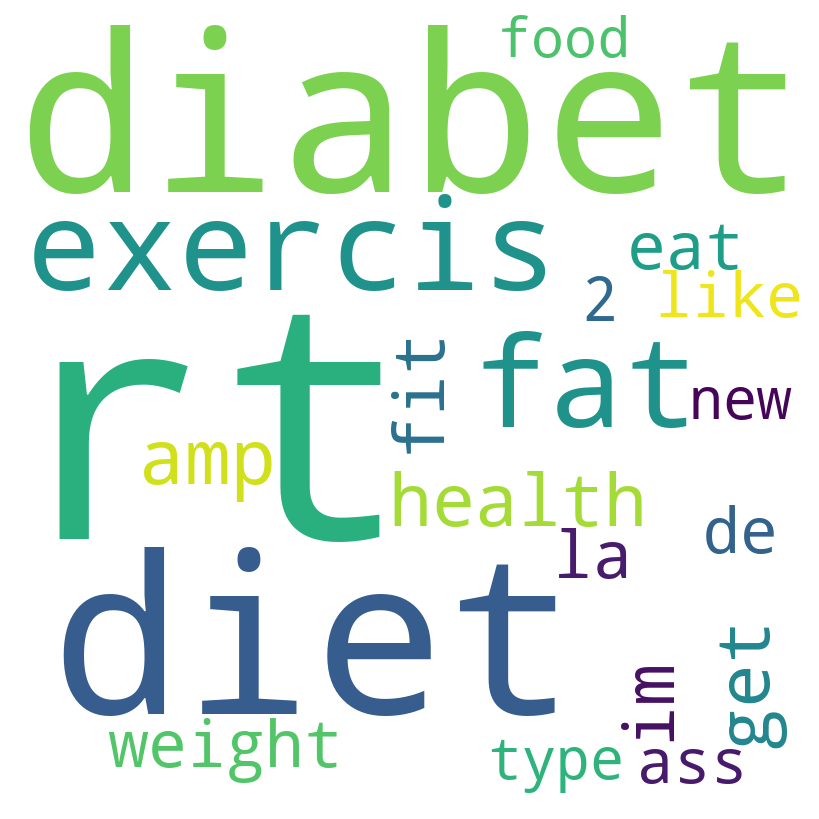

In [10]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the Twitter dataset
tweets_df = pd.read_csv('new_data.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
tweets_df['text'] = tweets_df['text'].astype(str)
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'http\S+', '', x)) # Remove URLs
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # Remove punctuations
tweets_df['text'] = tweets_df['text'].apply(lambda x: x.lower()) # Convert text to lowercase
tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])) # Remove stop words
tweets_df['text'] = tweets_df['text'].apply(lambda x: ' '.join([nltk.stem.PorterStemmer().stem(word) for word in x.split()])) # Stemming

# Extract the most frequent terms
all_words = ' '.join([text for text in tweets_df['text']])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

# Visualize the results
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(dict(common_words))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [11]:
tweets_df['text'] = tweets_df['text'].astype(str)
print(tweets_df['text'].dtype)

object


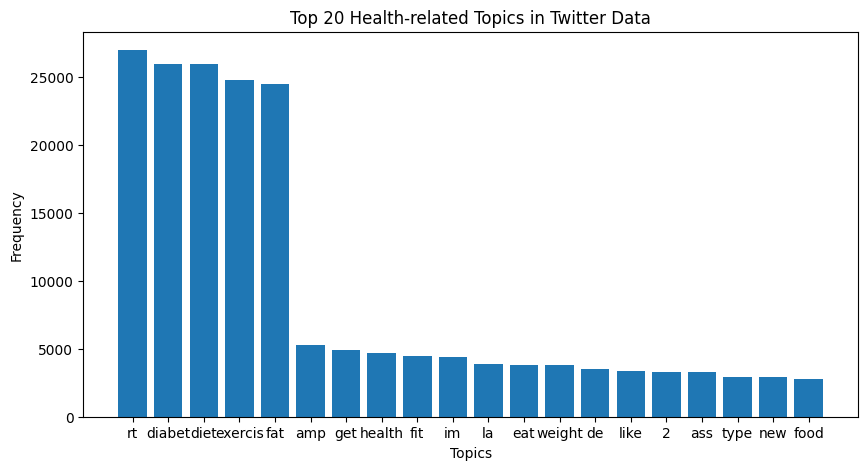

In [12]:
# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(common_words)), [val[1] for val in common_words])
plt.xticks(range(len(common_words)), [val[0] for val in common_words])
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Top 20 Health-related Topics in Twitter Data')
plt.show()

In [13]:
from scipy.stats import pearsonr
# Extract the frequency of each topic
topic_freq = {}
for topic in ['fat', 'diet', 'exercise', 'diabetes']:
    topic_freq[topic] = tweets_df[tweets_df['text'].str.contains(topic)].shape[0]

# Calculate the correlation between the topics
corr, _ = pearsonr(list(topic_freq.values()), list(topic_freq.values()))

print(f"The correlation between the top 4 topics is: {corr}")

The correlation between the top 4 topics is: 1.0


<AxesSubplot: >

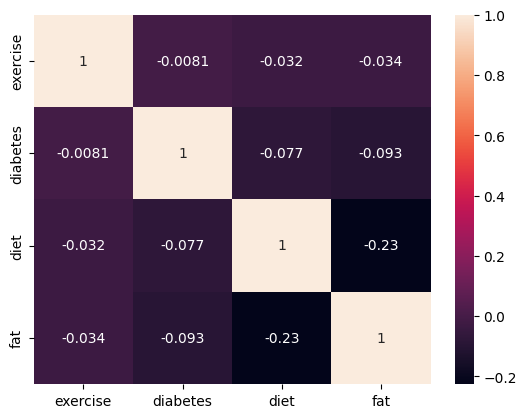

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

# Load the Twitter dataset
tweets_df = pd.read_csv('new_data.csv')

# Define the top 4 health-related topics
top_topics = ['exercise', 'diabetes', 'diet', 'fat']

# Preprocess the text data
stop_words = set(stopwords.words('english'))
tweets_df['Text'] = tweets_df['Text'].astype(str)
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: re.sub(r'http\S+', '', x)) # Remove URLs
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # Remove punctuations
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: x.lower()) # Convert text to lowercase
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])) # Remove stop words
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: ' '.join([nltk.stem.PorterStemmer().stem(word) for word in x.split()])) # Stemming

# Create a matrix of topic frequencies for the top 4 topics, with each row representing a tweet and each column representing a topic
freq_matrix = []
for topic in top_topics:
    freq_matrix.append(tweets_df['Text'].str.contains(topic).astype(int).values)
freq_matrix = np.array(freq_matrix).T

# Create a correlation matrix between the top 4 topics
corr_matrix = np.corrcoef(freq_matrix, rowvar=False)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, xticklabels=top_topics, yticklabels=top_topics)
